In [1]:
%load_ext tensorboard

In [2]:
from tensorflow.keras.datasets import fashion_mnist


In [3]:
(X_train, y_train), (X_test, y_test)=fashion_mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
%matplotlib inline


In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [11]:
# sns.set(font_scale=2)

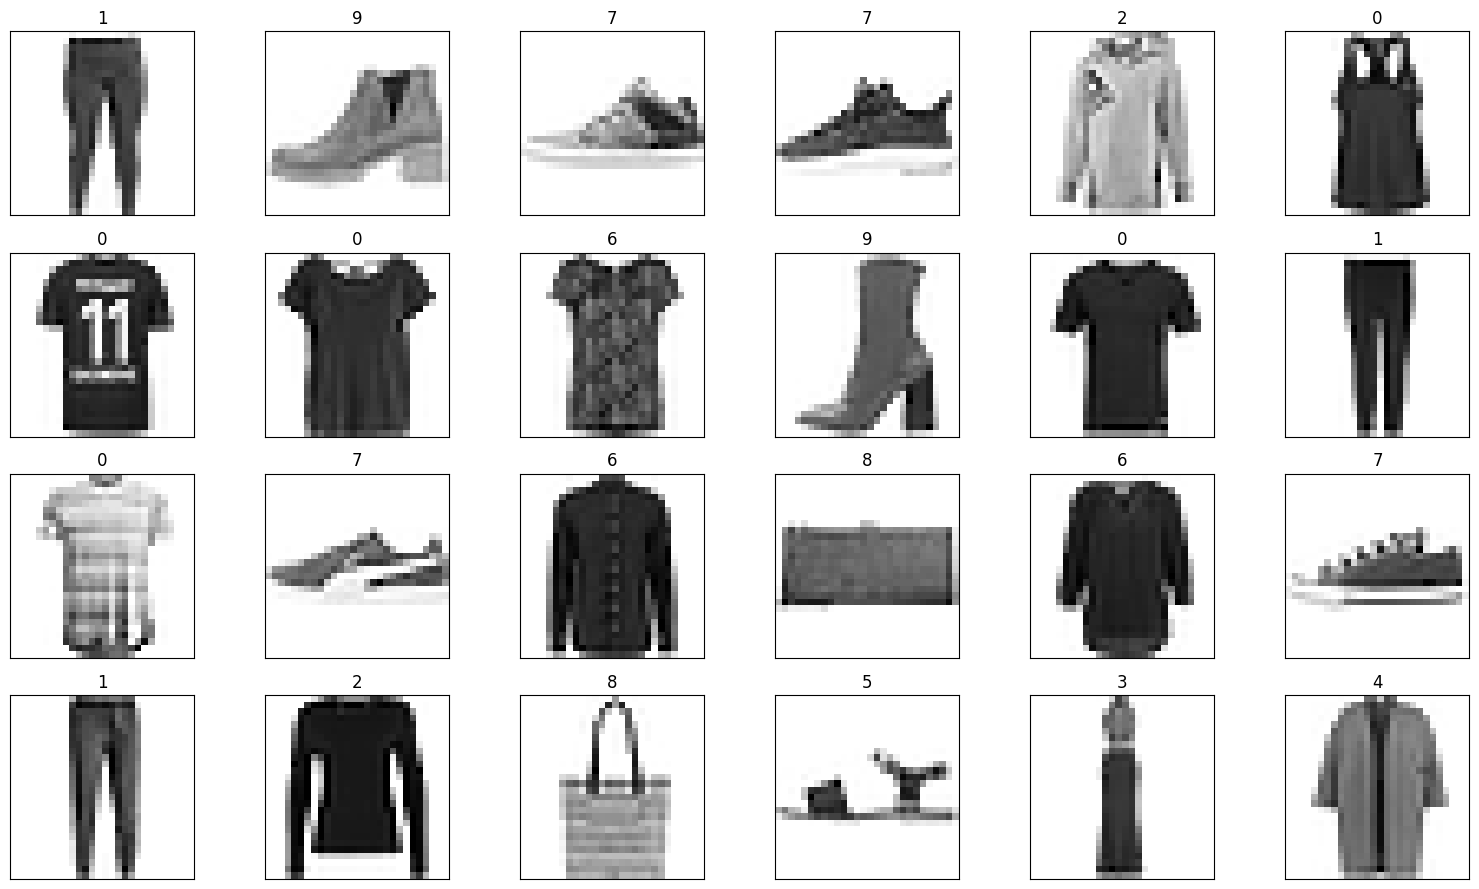

In [12]:
import numpy as np
index=np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes=plt.subplots(nrows=4, ncols=6, figsize=(16,9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target=item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)

    plt.tight_layout()

In [13]:
X_train=X_train.reshape((60000, 28, 28, 1))

In [14]:
X_train.shape

(60000, 28, 28, 1)

In [15]:
X_test=X_test.reshape((10000, 28, 28,1))

In [16]:
X_test.shape

(10000, 28, 28, 1)

In [17]:
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train=to_categorical(y_train)

In [20]:
y_train.shape

(60000, 10)

In [21]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [22]:
y_test=to_categorical(y_test)
y_test.shape

(10000, 10)

In [23]:
from tensorflow.keras.models import Sequential
cnn=Sequential()

In [24]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [25]:
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',
               input_shape=(28,28,1)))

In [26]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [27]:
cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [28]:
cnn.add(Flatten())

In [29]:
cnn.add(Dense(units=4096, activation='relu')) #Adding dense layer for 16.4

In [30]:
cnn.add(Dense(units=128, activation='relu'))

In [31]:
cnn.add(Dense(units=10, activation='softmax'))

In [32]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 4096)              1

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


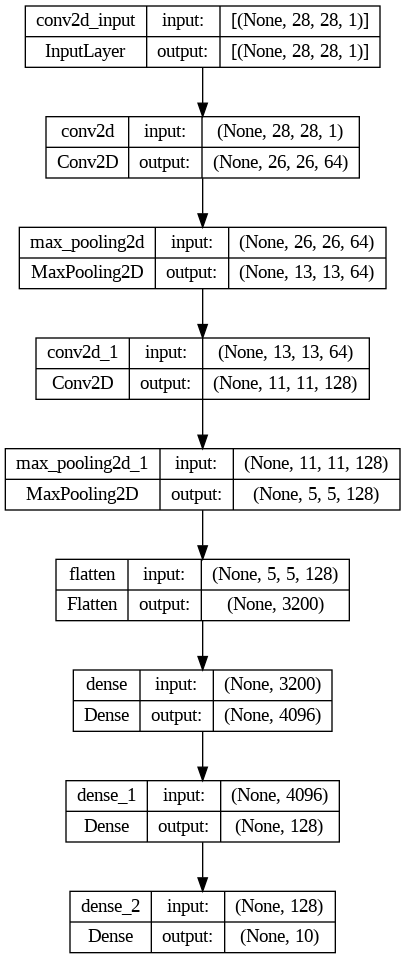

In [33]:
!pip install pydot
!apt install graphviz
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')


In [34]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [35]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 63s 73ms/step - loss: 0.4165 - accuracy: 0.8460 - val_loss: 0.3154 - val_accuracy: 0.8838
Epoch 2/5
844/844 [==============================] - 62s 73ms/step - loss: 0.2698 - accuracy: 0.8996 - val_loss: 0.2568 - val_accuracy: 0.9048
Epoch 3/5
844/844 [==============================] - 62s 73ms/step - loss: 0.2223 - accuracy: 0.9162 - val_loss: 0.2789 - val_accuracy: 0.8968
Epoch 4/5
844/844 [==============================] - 62s 73ms/step - loss: 0.1874 - accuracy: 0.9297 - val_loss: 0.2827 - val_accuracy: 0.9018
Epoch 5/5
844/844 [==============================] - 62s 73ms/step - loss: 0.1567 - accuracy: 0.9404 - val_loss: 0.2532 - val_accuracy: 0.9148


In [36]:
loss, accuracy=cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2713 - accuracy: 0.9098


In [37]:
loss

0.271308958530426

In [38]:
accuracy

0.9097999930381775

In [39]:
cnn.save('fashion_mnist.h7')